<a href="https://colab.research.google.com/github/asheta66/CNN/blob/main/Simple_CNN_for_Diabeties.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/100
20/20 [==============================] - 1s 14ms/step - loss: 3.8369 - accuracy: 0.4853 - val_loss: 1.9856 - val_accuracy: 0.3831
Epoch 2/100
20/20 [==============================] - 0s 6ms/step - loss: 1.4219 - accuracy: 0.5179 - val_loss: 1.0083 - val_accuracy: 0.5260
Epoch 3/100
20/20 [==============================] - 0s 6ms/step - loss: 1.0146 - accuracy: 0.5782 - val_loss: 1.0469 - val_accuracy: 0.6429
Epoch 4/100
20/20 [==============================] - 0s 8ms/step - loss: 0.8680 - accuracy: 0.5945 - val_loss: 0.7772 - val_accuracy: 0.5974
Epoch 5/100
20/20 [==============================] - 0s 6ms/step - loss: 0.8123 - accuracy: 0.5945 - val_loss: 0.7017 - val_accuracy: 0.6948
Epoch 6/100
20/20 [==============================] - 0s 5ms/step - loss: 0.7229 - accuracy: 0.6450 - val_loss: 0.9261 - val_accuracy: 0.6494
Epoch 7/100
20/20 [==============================] - 0s 5ms/step - loss: 0.7716 - accuracy: 0.6238 - val_loss: 0.7392 - val_accuracy: 0.6558
Epoch 8/100


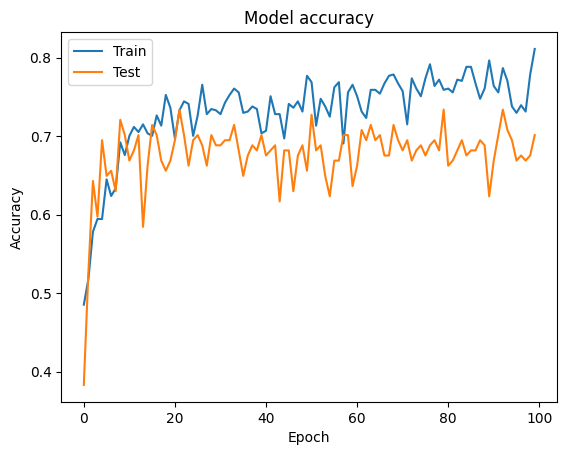

5/5 [==============================] - 0s 4ms/step
Confusion Matrix:
 [[85 14]
 [32 23]]
Accuracy: 0.7012987012987013
Precision: 0.6216216216216216
Recall: 0.41818181818181815
F1 Score: 0.5


In [32]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load and Preprocess the Data
data = pd.read_csv('diabetes.csv')

X = data.drop('Outcome', axis=1).values
y = data['Outcome'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Create the Neural Network Model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Step 3: Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 4: Train the Model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Step 5: Draw the Convergence Curve
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Step 6: Make Predictions and Calculate Metrics
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)
confusion = confusion_matrix(y_test, y_pred_binary)
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

# Print Metrics
print("Confusion Matrix:\n", confusion)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


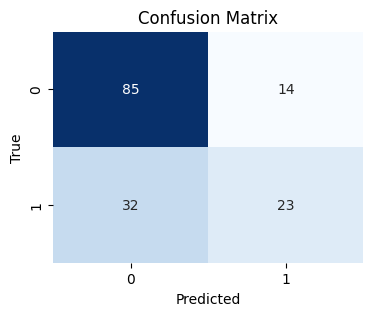

In [33]:
# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred_binary)

# Draw the confusion matrix using Seaborn
plt.figure(figsize=(4,3))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()